In this dataset , column "**Unit of Appropriation**" is categorized into different categories by creating the seperate category columns.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('expense.csv')

In [3]:
df.head()

,Agency Code,Agency,Agency Name,Unit of Appropriation,Unit of Appropriation Name,PS_OTPS_Ind,"Expenditures_ FY18($000,000)","February 2019 Financial PlanFY19 ($000,000)",Applicable_MMR_Goals,Notes
0,NaN,311,311,NaN,NaN,NaN,NaN,NaN,NaN,311 is contained within the Department of Info...
1,NaN,NYCHA,NEW YORK CITY HOUSING AUTHORITY,NaN,NaN,NaN,NaN,NaN,NaN,The City's contributions to the New York City ...
2,NaN,SCA,DEPARTMENT OF EDUCATION - SCHOOL CONSTRUCTION ...,NaN,NaN,NaN,NaN,NaN,NaN,The City's contributions to the School Constru...
3,3.0,BOE,BOARD OF ELECTIONS,1.0,PERSONAL SERVICES,Personal Services,64.8,71.7,NaN,These figures are limited to the City’s contri...
4,3.0,BOE,BOARD OF ELECTIONS,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,64.5,75.6,NaN,These figures are limited to the City’s contri...


In [4]:
df.describe()

,Agency Code,Unit of Appropriation,"Expenditures_ FY18($000,000)","February 2019 Financial PlanFY19 ($000,000)"
count,282.000000,282.000000,274.000000,282.000000
mean,437.209220,110.411348,235.742336,238.419858
std,380.559079,182.271905,676.629818,693.966878
min,3.000000,1.000000,0.000000,0.100000
25%,56.000000,3.000000,9.150000,10.200000
50%,226.000000,9.000000,37.100000,39.800000
75%,827.000000,112.000000,152.325000,155.600000
max,866.000000,890.000000,6607.300000,7158.700000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Agency Code                                  282 non-null    float64
 1   Agency                                       285 non-null    object 
 2   Agency Name                                  285 non-null    object 
 3   Unit of Appropriation                        282 non-null    float64
 4   Unit of Appropriation Name                   282 non-null    object 
 5   PS_OTPS_Ind                                  282 non-null    object 
 6   Expenditures_ FY18($000,000)                 274 non-null    float64
 7   February 2019 Financial PlanFY19 ($000,000)  282 non-null    float64
 8   Applicable_MMR_Goals                         267 non-null    object 
 9   Notes                                        30 non-null     object 
dtypes:

In [6]:
# dropping null rows
df=df.drop([0,1,2])

In [7]:
df.shape

(282, 10)

In [8]:
df.reset_index(inplace=True)

In [9]:
df.head()

,index,Agency Code,Agency,Agency Name,Unit of Appropriation,Unit of Appropriation Name,PS_OTPS_Ind,"Expenditures_ FY18($000,000)","February 2019 Financial PlanFY19 ($000,000)",Applicable_MMR_Goals,Notes
0,3,3.0,BOE,BOARD OF ELECTIONS,1.0,PERSONAL SERVICES,Personal Services,64.8,71.7,NaN,These figures are limited to the City’s contri...
1,4,3.0,BOE,BOARD OF ELECTIONS,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,64.5,75.6,NaN,These figures are limited to the City’s contri...
2,5,17.0,NYCEM,DEPARTMENT OF EMERGENCY MANAGEMENT,1.0,PERSONAL SERVICES,Personal Services,16.1,25.4,All,NaN
3,6,17.0,NYCEM,DEPARTMENT OF EMERGENCY MANAGEMENT,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,42.8,46.5,All,NaN
4,7,25.0,LAW,LAW DEPARTMENT,1.0,PERSONAL SERVICES,Personal Services,136.5,159.8,All,NaN


In [10]:
# checking null rows in 'Unit of Appropriation Name'
df['Unit of Appropriation Name'].isnull().sum()


0

In [11]:

df['PS_OTPS_Ind'].unique()

array(['Personal Services', 'Other Than Personal Services'], dtype=object)

In [12]:
# find unique values
df['Unit of Appropriation Name'].unique()

array(['PERSONAL SERVICES', 'OTHER THAN PERSONAL SERVICES',
       'GEOGRAPHIC SYSTEMS', 'INSPECTOR GENERAL-PS',
       'INSPECTOR GENERAL-OTPS', 'LUMP SUM APPROPRIATION',
       'LUMP SUM-BORO OF MANHATTAN', 'LUMP SUM- BORO OF BRONX',
       'LUMP SUM-BORO OF STATEN ISL', 'SYSTEMWIDE SERVICES',
       'CONSULTANT & ADVISORY SVCS', 'LUMP SUM',
       'GE INSTR & SCH LEADERSHIP - PS', 'SE INSTR & SCH LEADERSHIP - PS',
       'UNIVERSAL PRE-K - PS', 'EARLY CHILDHOOD PROGRAMS',
       'SCHOOL SUPPORT ORGANIZATION',
       'CW SE INSTR & SCHL LEADERSHIP - PS',
       'SE INSTRUCTIONAL SUPPORT - PS', 'SCHOOL FACILITIES - PS',
       'SCHOOL FOOD SERVICES - PS', 'CENTRAL ADMINISTRATION - PS',
       'FRINGE BENEFITS - PS', 'CATEGORICAL PROGRAMS - PS',
       'COLLECTIVE BARGAINING - PS', 'GE INSTR & SCH LEADERSHIP - OTPS',
       'SE INSTR & SCH LEADERSHIP -OTPS', 'CHARTER SCHOOLS',
       'UNIVERSAL PRE-K - OTPS', 'SCHOOL SUPPORT ORGANIZATION OTPS',
       'CW SE INSTR & SCHL LEADERSHIP - O

In [13]:
family = ['child','family']
invest = ['lump sum','asset']
food = ['food']
health = ['medical','mental','health','disease','- ps','care']
residental =  ['hous','home']
fire_emgncy = ['fire']
envirnmt = ['water','environmental','cleaning']


In [14]:


# (df['Unit of Appropriation Name']=='OTPS-HIGHWAY OPERATIONS').sum()

In [15]:
category = ['family','invest','food','health','residental','fire_emgncy','envirnmt']

In [16]:
indx =[]
for y in family:
  indx.extend((df[df['Unit of Appropriation Name'].str.lower().str.contains(y)].index).tolist())
  #print(list(set(indx)))
  k= list(set(indx))
df.loc[k,'category']= 'family'

In [17]:
indx =[]
for y in invest:
  indx.extend((df[df['Unit of Appropriation Name'].str.lower().str.contains(y)].index).tolist())
  #print(list(set(indx)))
  k= list(set(indx))
df.loc[k,'category']= 'invest'

In [18]:
indx =[]
for y in food:
  indx.extend((df[df['Unit of Appropriation Name'].str.lower().str.contains(y)].index).tolist())
  #print(list(set(indx)))
  k= list(set(indx))
df.loc[k,'category']= 'food'

In [19]:
indx =[]
for y in health:
  indx.extend((df[df['Unit of Appropriation Name'].str.lower().str.contains(y)].index).tolist())
  #print(list(set(indx)))
  k= list(set(indx))
df.loc[k,'category']= 'health'

In [20]:
indx =[]
for y in residental:
  indx.extend((df[df['Unit of Appropriation Name'].str.lower().str.contains(y)].index).tolist())
  #print(list(set(indx)))
  k= list(set(indx))
df.loc[k,'category']= 'residental'

In [21]:
indx =[]
for y in fire_emgncy:
  indx.extend((df[df['Unit of Appropriation Name'].str.lower().str.contains(y)].index).tolist())
  #print(list(set(indx)))
  k= list(set(indx))
df.loc[k,'category']= 'fire_emgncy'

In [22]:
indx =[]
for y in envirnmt:
  indx.extend((df[df['Unit of Appropriation Name'].str.lower().str.contains(y)].index).tolist())
  #print(list(set(indx)))
  k= list(set(indx))
df.loc[k,'category']= 'envirnmt'

In [23]:
df.head(n=100)

,index,Agency Code,Agency,Agency Name,Unit of Appropriation,Unit of Appropriation Name,PS_OTPS_Ind,"Expenditures_ FY18($000,000)","February 2019 Financial PlanFY19 ($000,000)",Applicable_MMR_Goals,Notes,category
0,3,3.0,BOE,BOARD OF ELECTIONS,1.0,PERSONAL SERVICES,Personal Services,64.8,71.7,NaN,These figures are limited to the City’s contri...,NaN
1,4,3.0,BOE,BOARD OF ELECTIONS,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,64.5,75.6,NaN,These figures are limited to the City’s contri...,NaN
2,5,17.0,NYCEM,DEPARTMENT OF EMERGENCY MANAGEMENT,1.0,PERSONAL SERVICES,Personal Services,16.1,25.4,All,NaN,NaN
3,6,17.0,NYCEM,DEPARTMENT OF EMERGENCY MANAGEMENT,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,42.8,46.5,All,NaN,NaN
4,7,25.0,LAW,LAW DEPARTMENT,1.0,PERSONAL SERVICES,Personal Services,136.5,159.8,All,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,69.0,HRA,HUMAN RESOURCES ADMINISTRATION,203.0,PUBLIC ASSISTANCE,Personal Services,283.3,300.6,"1a, 1b, 2a, 2b, 2c, 3a",NaN,NaN
96,99,69.0,HRA,HUMAN RESOURCES ADMINISTRATION,204.0,MEDICAL ASSISTANCE,Personal Services,72.2,103.4,"1c, 2b, 4a",NaN,health
97,100,69.0,HRA,HUMAN RESOURCES ADMINISTRATION,205.0,ADULT SERVICES,Personal Services,113.7,128.1,"1c, 2a, 2b, 2c, 3a, 3b, 4a",NaN,NaN
98,101,69.0,HRA,HUMAN RESOURCES ADMINISTRATION,101.0,ADMINISTRATION-OTPS,Other Than Personal Services,289.3,288.4,All,NaN,NaN


In [24]:
# total categories after operation
df['category'].unique()

array([nan, 'invest', 'health', 'family', 'food', 'residental',
       'fire_emgncy', 'envirnmt'], dtype=object)

In [25]:
# replacing remaining(NaN) by Other
df['category']=df['category'].replace(np.nan , 'Others')

In [26]:
df.head(n=50)

,index,Agency Code,Agency,Agency Name,Unit of Appropriation,Unit of Appropriation Name,PS_OTPS_Ind,"Expenditures_ FY18($000,000)","February 2019 Financial PlanFY19 ($000,000)",Applicable_MMR_Goals,Notes,category
0,3,3.0,BOE,BOARD OF ELECTIONS,1.0,PERSONAL SERVICES,Personal Services,64.8,71.7,NaN,These figures are limited to the City’s contri...,Others
1,4,3.0,BOE,BOARD OF ELECTIONS,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,64.5,75.6,NaN,These figures are limited to the City’s contri...,Others
2,5,17.0,NYCEM,DEPARTMENT OF EMERGENCY MANAGEMENT,1.0,PERSONAL SERVICES,Personal Services,16.1,25.4,All,NaN,Others
3,6,17.0,NYCEM,DEPARTMENT OF EMERGENCY MANAGEMENT,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,42.8,46.5,All,NaN,Others
4,7,25.0,LAW,LAW DEPARTMENT,1.0,PERSONAL SERVICES,Personal Services,136.5,159.8,All,NaN,Others
5,8,25.0,LAW,LAW DEPARTMENT,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,90.7,94.0,All,NaN,Others
6,9,30.0,DCP,DEPARTMENT OF CITY PLANNING,1.0,PERSONAL SERVICES,Personal Services,23.5,29.2,All,NaN,Others
7,10,30.0,DCP,DEPARTMENT OF CITY PLANNING,3.0,GEOGRAPHIC SYSTEMS,Personal Services,2.1,2.5,2a,NaN,Others
8,11,30.0,DCP,DEPARTMENT OF CITY PLANNING,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,10.3,22.9,All,NaN,Others
9,12,30.0,DCP,DEPARTMENT OF CITY PLANNING,4.0,GEOGRAPHIC SYSTEMS,Other Than Personal Services,0.2,0.3,2a,NaN,Others


In [27]:
# checking health data
df[df['category'] =='health']

,index,Agency Code,Agency,Agency Name,Unit of Appropriation,Unit of Appropriation Name,PS_OTPS_Ind,"Expenditures_ FY18($000,000)","February 2019 Financial PlanFY19 ($000,000)",Applicable_MMR_Goals,Notes,category
22,25,40.0,DOE,DEPARTMENT OF EDUCATION,401.0,GE INSTR & SCH LEADERSHIP - PS,Personal Services,6607.3,7158.7,"1a, 1b, 2a, 2b, 3a, 3b",NaN,health
23,26,40.0,DOE,DEPARTMENT OF EDUCATION,403.0,SE INSTR & SCH LEADERSHIP - PS,Personal Services,1868.3,1962.7,"1a, 1b, 2a, 2b, 3a, 3b",NaN,health
24,27,40.0,DOE,DEPARTMENT OF EDUCATION,407.0,UNIVERSAL PRE-K - PS,Personal Services,490.2,476.7,"1a, 1b, 2a, 2b",NaN,health
27,30,40.0,DOE,DEPARTMENT OF EDUCATION,421.0,CW SE INSTR & SCHL LEADERSHIP - PS,Personal Services,1114.7,1177.0,"1a, 2b",NaN,health
28,31,40.0,DOE,DEPARTMENT OF EDUCATION,423.0,SE INSTRUCTIONAL SUPPORT - PS,Personal Services,330.3,351.6,"1a, 2b",NaN,health
29,32,40.0,DOE,DEPARTMENT OF EDUCATION,435.0,SCHOOL FACILITIES - PS,Personal Services,169.3,197.0,"1a, 2b, 4a",NaN,health
30,33,40.0,DOE,DEPARTMENT OF EDUCATION,439.0,SCHOOL FOOD SERVICES - PS,Personal Services,235.4,238.4,"1a, 2b",NaN,health
31,34,40.0,DOE,DEPARTMENT OF EDUCATION,453.0,CENTRAL ADMINISTRATION - PS,Personal Services,202.5,219.1,All,NaN,health
32,35,40.0,DOE,DEPARTMENT OF EDUCATION,461.0,FRINGE BENEFITS - PS,Personal Services,3302.0,3560.4,All,NaN,health
33,36,40.0,DOE,DEPARTMENT OF EDUCATION,481.0,CATEGORICAL PROGRAMS - PS,Personal Services,1004.4,1027.3,All,NaN,health


In [28]:
 # saving final dataframe in CSV file
 df.to_csv('final.csv')


In [29]:
df['category'].value_counts()

Others         205
health          39
invest           9
residental       8
envirnmt         8
family           6
fire_emgncy      6
food             1
Name: category, dtype: int64

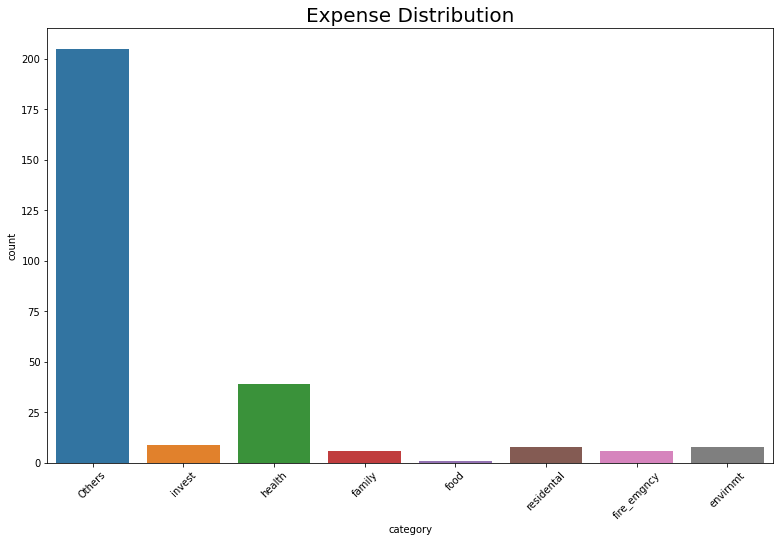

In [30]:
plt.figure(figsize=(13, 8))
b=sns.countplot(x=df['category'],data= df)
b.axes.set_title("Expense Distribution",fontsize=20)

plt.xticks(rotation=45)
plt.show()

In [31]:
# by removing others, compairing remaing category
df1 =df[df['category']!='Others']

In [32]:
df1

,index,Agency Code,Agency,Agency Name,Unit of Appropriation,Unit of Appropriation Name,PS_OTPS_Ind,"Expenditures_ FY18($000,000)","February 2019 Financial PlanFY19 ($000,000)",Applicable_MMR_Goals,Notes,category
14,17,35.0,NYPL,NEW YORK PUBLIC LIBRARY - RESEARCH,1.0,LUMP SUM APPROPRIATION,Other Than Personal Services,28.1,28.7,NaN,These figures are limited to the City’s contri...,invest
15,18,37.0,NYPL,NEW YORK PUBLIC LIBRARY,3.0,LUMP SUM-BORO OF MANHATTAN,Other Than Personal Services,25.8,26.0,NaN,These figures are limited to the City’s contri...,invest
16,19,37.0,NYPL,NEW YORK PUBLIC LIBRARY,4.0,LUMP SUM- BORO OF BRONX,Other Than Personal Services,24.3,24.4,NaN,These figures are limited to the City’s contri...,invest
17,20,37.0,NYPL,NEW YORK PUBLIC LIBRARY,5.0,LUMP SUM-BORO OF STATEN ISL,Other Than Personal Services,10.2,10.2,NaN,These figures are limited to the City’s contri...,invest
20,23,38.0,BPL,BROOKLYN PUBLIC LIBRARY,1.0,LUMP SUM,Other Than Personal Services,105.9,110.3,NaN,These figures are limited to the City’s contri...,invest
...,...,...,...,...,...,...,...,...,...,...,...,...
203,206,827.0,DSNY,DEPARTMENT OF SANITATION,102.0,CLEANING & COLLECTION,Personal Services,761.3,777.9,"1a, 1b, 2a, 3a",NaN,envirnmt
209,212,827.0,DSNY,DEPARTMENT OF SANITATION,109.0,CLEANING & COLLECTION-OTPS,Other Than Personal Services,36.3,33.0,"1a, 1b, 2a, 3a",NaN,envirnmt
253,256,856.0,DCAS,DEPARTMENT OF CITYWIDE ADMIN SERVICE,200.0,DIV OF ADMINISTRATION AND SECURITY - PS,Personal Services,14.0,14.0,All,NaN,health
254,257,856.0,DCAS,DEPARTMENT OF CITYWIDE ADMIN SERVICE,300.0,ASSET MANAGEMENT-PUBLIC FACILITIES,Personal Services,106.8,109.3,"2a, 2b, 2c, 3a",NaN,invest


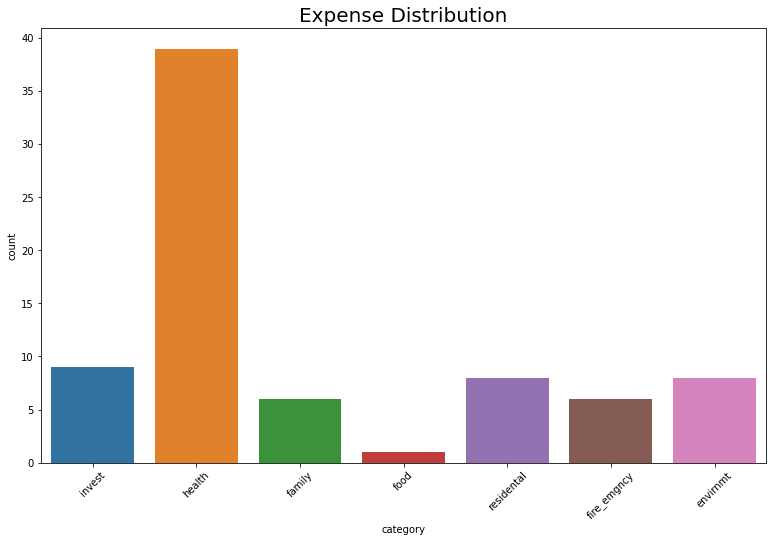

In [33]:
plt.figure(figsize=(13, 8))
b=sns.countplot(x=df1['category'],data= df1)
b.axes.set_title("Expense Distribution",fontsize=20)

plt.xticks(rotation=45)
plt.show()

In [34]:
df['Agency Name'].unique()


array(['BOARD OF ELECTIONS', 'DEPARTMENT OF EMERGENCY MANAGEMENT',
       'LAW DEPARTMENT', 'DEPARTMENT OF CITY PLANNING',
       'DEPARTMENT OF INVESTIGATION',
       'NEW YORK PUBLIC LIBRARY - RESEARCH', 'NEW YORK PUBLIC LIBRARY',
       'BROOKLYN PUBLIC LIBRARY', 'QUEENS BOROUGH PUBLIC LIBRARY',
       'DEPARTMENT OF EDUCATION', 'CITY UNIVERSITY OF NEW YORK',
       'CIVILIAN COMPLAINT REVIEW BOARD', 'POLICE DEPARTMENT',
       'FIRE DEPARTMENT', "DEPARTMENT OF VETERANS' SERVICES",
       "ADMIN FOR CHILDREN'S SERVICES", 'HUMAN RESOURCES ADMINISTRATION',
       'DEPARTMENT OF HOMELESS SERVICES', 'DEPARTMENT OF CORRECTION',
       'DEPARTMENT FOR THE AGING', 'DEPARTMENT OF CULTURAL AFFAIRS',
       'LANDMARKS PRESERVATION COMM.', 'TAXI AND LIMOUSINE COMMISSION',
       'COMMISSION ON HUMAN RIGHTS',
       'DEPARTMENT OF YOUTH & COMMUNITY DEVELOPMENT',
       'DEPARTMENT OF PROBATION', 'DEPARTMENT OF SMALL BUSINESS SERVICES',
       'HOUSING PRESERVATION AND DEVELOPMENT', 'DEPARTMENT 

In [35]:
df['Agency Name'].value_counts()

DEPARTMENT OF EDUCATION                                      31
DEPARTMENT OF CULTURAL AFFAIRS                               22
DEPARTMENT OF HEALTH AND MENTAL HYGIENE                      21
DEPARTMENT OF CITYWIDE ADMIN SERVICE                         20
DEPARTMENT OF FINANCE                                        14
POLICE DEPARTMENT                                            14
DEPARTMENT OF SANITATION                                     12
FIRE DEPARTMENT                                              10
DEPARTMENT OF TRANSPORTATION                                 10
HOUSING PRESERVATION AND DEVELOPMENT                          9
HUMAN RESOURCES ADMINISTRATION                                9
DEPARTMENT OF ENVIRONMENTAL PROTECT.                          8
DEPARTMENT OF SMALL BUSINESS SERVICES                         8
ADMIN FOR CHILDREN'S SERVICES                                 8
DEPARTMENT OF PARKS AND RECREATION                            8
DEPARTMENT OF INFORMATION TECHNOLOGY & T

In [36]:
x=df['Agency Name'].value_counts()[:20].index
df2=df[df['Agency Name'].isin(x)]

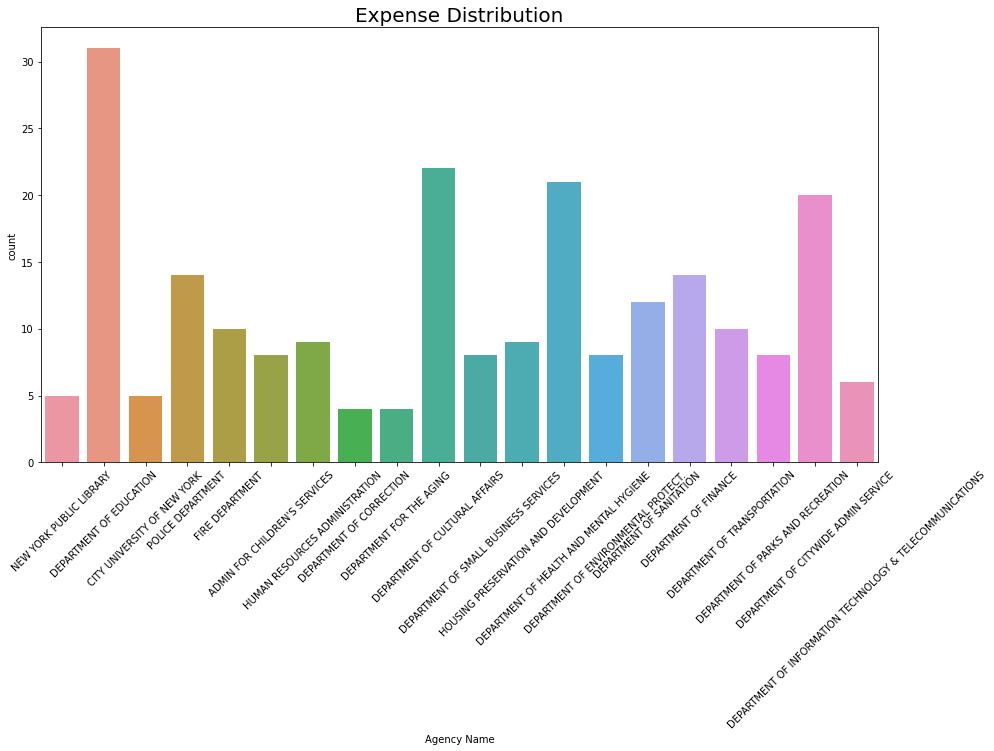

In [37]:
plt.figure(figsize=(15, 8))
b=sns.countplot(x=df2['Agency Name'])
b.axes.set_title("Expense Distribution",fontsize=20)

plt.xticks(rotation=45)
plt.show()